In [59]:
#imports
import numpy as np
from typing import List, Tuple
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Get Random Board State

In [1]:
# dictionary of config parameters
board_config = {
    "board_len" : 5,
    "board_width" : 5,
    "green" : 4,
    "white" : 4,
    "red" : 4,
    "yellow" : 4,
    "orange" : 4,
    "blue" : 4,
    "blank" : 1,
}

In [82]:
colors_to_num1 = {
    "g" : 1,
    "w" : 2,
    "r" : 3,
    "y" : 4,
    "o" : 5,
    "b" : 6,
    "_" : 0,
}

In [78]:
colors_to_num2 = {
    "g" : 0,
    "w" : 1,
    "r" : 2,
    "y" : 3,
    "o" : 4,
    "b" : 5
}

In [100]:
cmap1 = ListedColormap(['k', 'g', 'w', 'r', 'yellow', 'orange', 'b'])
cmap2 = ListedColormap(['g', 'w', 'r', 'y', 'orange', 'b'])

In [80]:
def board_to_num(board: List[List[str]], isBoard: bool):
    new_board = []
    for row in board:
        new_row = []
        for color in row:
            if isBoard:
                num = colors_to_num1[color]
            else:
                num = colors_to_num2[color]
            new_row.append(num)
        new_board.append(new_row)
    return new_board

In [42]:
# option to get colors for board or for goal
def get_colors(board: bool) -> List[str]:
    reds = ["r"] * board_config["red"]
    blues = ["b"] * board_config["blue"]
    yellows = ["y"] * board_config["yellow"]
    oranges = ["o"] * board_config["orange"]
    whites = ["w"] * board_config["white"]
    greens = ["g"] * board_config["green"]
    blank = ["_"]
    colors = reds + blues + yellows + oranges + whites + greens
    if board:
        colors += blank
    return colors


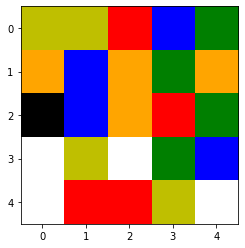

In [109]:
def random_board() -> List[List[str]]:
    board = []
    colors = get_colors(True)
    random.shuffle(colors)
    #print(len(colors))
    for i in range(0, board_config["board_len"]):
        row = []
        #print(f"i: {i}")
        for j in range(0, board_config["board_width"]):
            #print(f"j: {j}")
            color = colors.pop()
            row.append(color)
        board.append(row)
    return board

board = random_board()
board = board_to_num(board, True)
plt.imshow(board, cmap=cmap)

## Random Goal State

In [44]:
# goal pattern has no blanks and is smaller
goal_config = {
    "len": 3,
    "width": 3,
    "green" : 4,
    "white" : 4,
    "red" : 4,
    "yellow" : 4,
    "orange" : 4,
    "blue" : 4
}

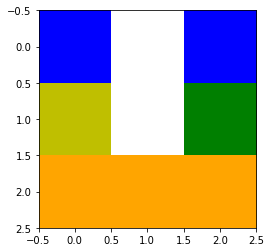

In [94]:
def random_goal() -> List[List[str]]:
    colors = get_colors(False)
    random.shuffle(colors)
    goal = []
    for i in range(0, goal_config["len"]):
        row = []
        for j in range(0, goal_config["width"]):
            color = colors.pop()
            row.append(color)
        goal.append(row)
    return goal

goal = random_goal()
goal = board_to_num(goal, False)
plt.imshow(goal, cmap=cmap2)

# Board Class

In [ ]:
# actions are from the perspective of the blank space
# ie up moves the blank space up one
actions = [
    "up",
    "down",
    "left",
    "right"
]

In [37]:
class Board:

    def __init__(self, board: List[List[str]], goal: List[List[str]]):
        self.board = board
        self.len = len(board)
        self.width = len(board[0])
        self.goal = goal
        self.goal_len = len(goal)
        self.goal_width = len(goal[0])

    def get_blank_loc(state: List[List[str]]) -> Tuple[int, int]:
        for row, i in enumerate(state):
            for tile, j in enumerate(row):
                if tile == "_":
                    return (i, j)

    def canMoveUp(self, y: int) -> bool:
        return (y != 0)

    def canMoveDown(self, y: int) -> bool:
        return (y != self.len - 1)

    def canMoveLeft(self, x: int) -> bool:
        return (x != 0)

    def canMoveRight(self, x: int) -> bool:
        return (x != self.width - 1)

    def get_available_moves(self, state: List[List[str]]) -> List[str]:
        moves = []
        y, x = self.get_blank_loc(state)
        if self.canMoveUp(y):
            moves.append(actions[0])
        if self.canMoveDown(y):
            moves.append(actions[1])
        if self.canMoveLeft(x):
            moves.append(actions[2])
        if self.canMoveRight(x):
            moves.append(actions[3])
        return moves

    def check_at_goal(self, state: List[List[str]]):
        goal = self.goal
        center = []
        for i in range(1, self.len - 1):
                row = []
                for j in range(1, self.width - 1):
                    row.append(state[i][j])
                center.append(row)
        for i in range(0, self.goal_len):
            for j in range(0, self.goal_width):
                if goal[i][j] != center[i][j]:
                    return False
        return True


    # returns board state from taking a certain action
    def next_state(self, state: List[List[str]], action: str):
        y, x = self.get_blank_loc()
        next_x = x,
        next_y = y
        if action == "up":
            next_y -= 1
        elif action == "down":
            next_y += 1
        elif action == "left":
            next_x -= 1
        else:
            next_x += 1
        # get value of other tile
        swap_val = state[next_y][next_x]
        # set blank
        state[next_y][next_x] = "_"
        # set old value
        state[y][x] = swap_val

        return state

    # applies action to current board state
    def take_action(self, action: str):
        board = self.board
        new_board = self.next_state(board, action)
        self.board = new_board
